In [1]:
import numpy as np
import pandas as pd

In [102]:
import matplotlib
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

matplotlib.rc("font", size=18)

In [105]:
houses = pd.read_csv("houses.csv")

In [108]:
houses.head(7)

,dim_1,dim_2,level,price
0,29,28,luxury,2212.0
1,28,29,luxury,2203.0
2,6,9,basic,254.0
3,5,9,basic,242.0
4,6,6,basic,195.0
5,5,8,basic,200.0
6,27,29,luxury,2108.0


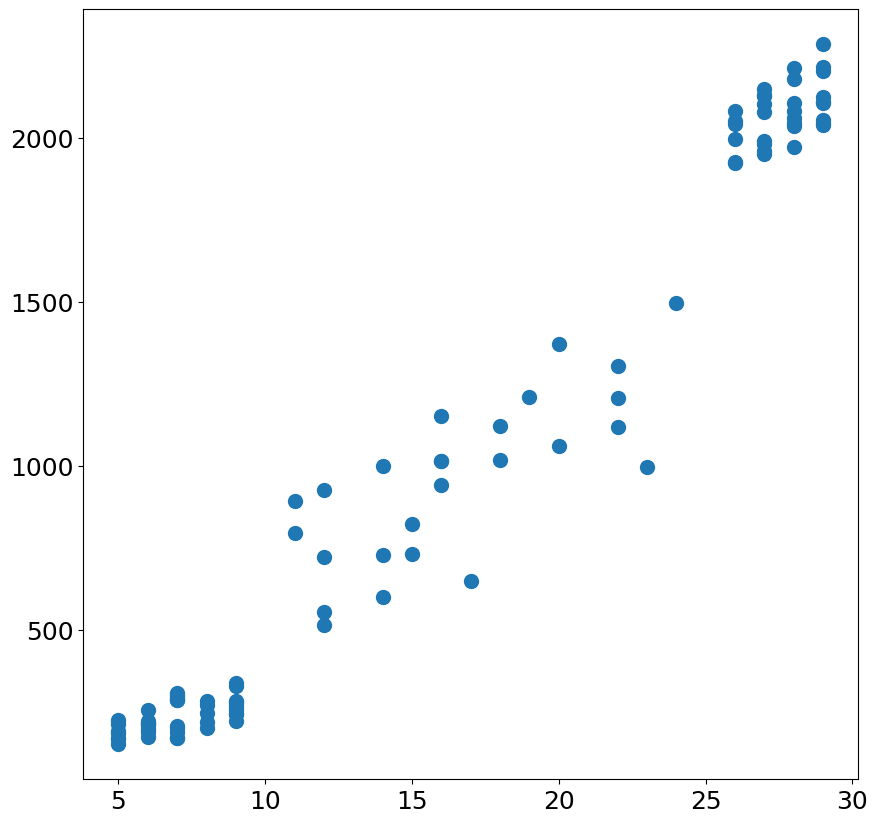

In [110]:
fig = plt.figure(figsize=(10, 10))
ax = plt.axes()

ax.scatter(houses["dim_2"], houses["price"], s=100)

plt.show()

In [111]:
from sklearn.linear_model import LinearRegression

In [135]:
X = houses[["dim_1"]]
Y = houses["price"]
reg = LinearRegression().fit(X,Y)


In [136]:
reg.coef_

array([83.08870109])

In [137]:
reg.intercept_


-351.68469784672334

In [160]:
[b] = reg.coef_
a = reg.intercept_

In [161]:
def reg_prediction(dim_1):
    return a + b * dim_1

In [163]:
reg_prediction(X.dim_1[0])

2057.887633711507

In [179]:
reg.predict(X[2:3])[0]

146.84750868256572

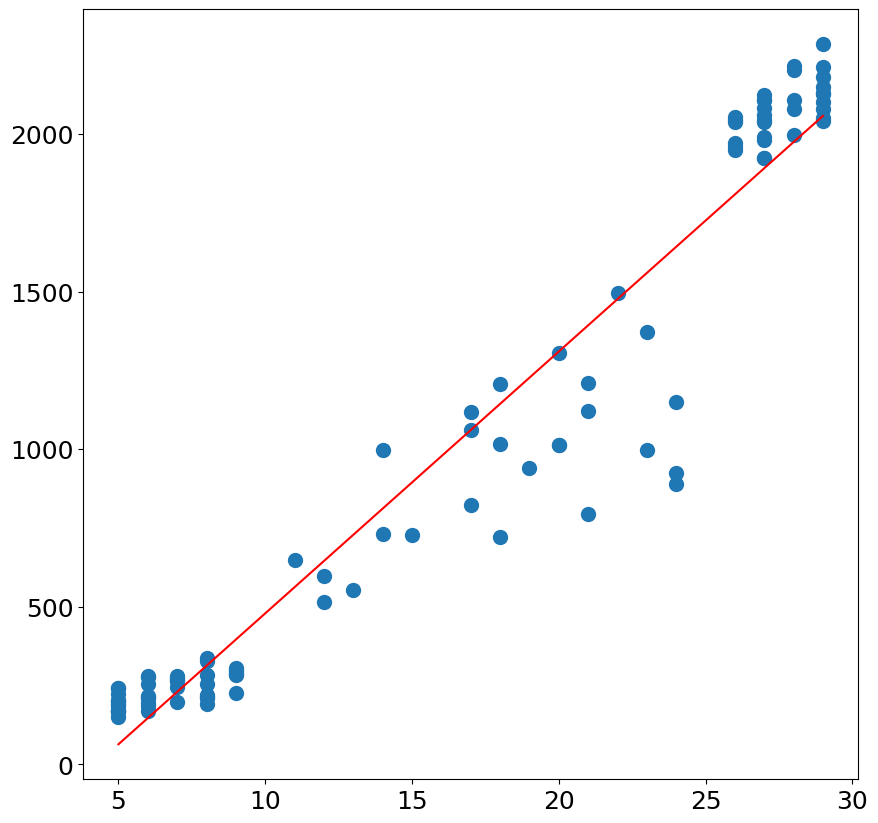

In [182]:
fig = plt.figure(figsize = (10, 10))
ax = plt.axes()

ax.scatter(houses['dim_1'], houses['price'], s=100)
ax.plot([X.dim_1.min(),X.dim_1.max()], [reg_prediction(X.dim_1.min()), reg_prediction(X.dim_1.max())], c = "red")

In [183]:
[reg_prediction(X.dim_1.min()), reg_prediction(X.dim_1.max())]

[63.75880759435091, 2057.887633711507]

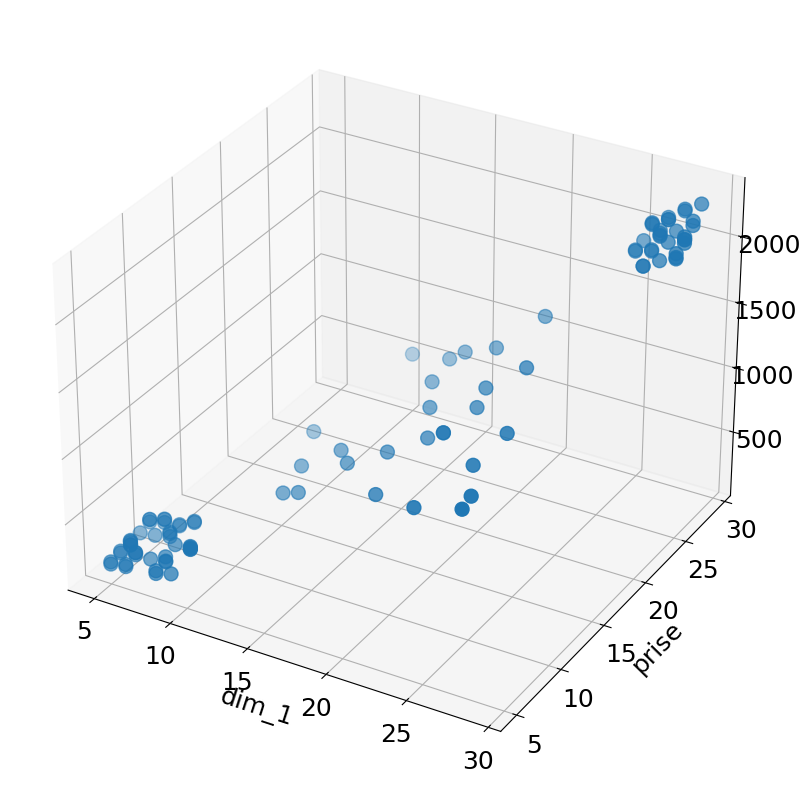

In [185]:
fig = plt.figure(figsize=(10,10))
ax = plt.axes(projection="3d")

ax.scatter(houses["dim_1"], houses["dim_2"], houses["price"], s=100)

ax.set_xlabel("dim_1")
ax.set_ylabel("dim_2")
ax.set_ylabel("prise")

plt.show()

In [209]:
X = houses[['dim_1',"dim_2"]]
Y = houses['price']

reg = LinearRegression().fit(X,Y)

In [210]:
[b1, b2] = reg.coef_
a = reg.intercept_

def reg_prediction(dim_1, dim_2):
    return a + dim_1 * b1 + dim_2 * b2

In [211]:
reg_prediction(X.dim_1[0], X.dim_2[0])

2080.82359179565

In [212]:
reg.predict(X[0:1])[0]

2080.82359179565

In [223]:
d1, d2 = list(), list()
for x in np.linspace(min(houses["dim_1"]), max(houses["dim_2"]), 100):
    for y in np.linspace(min(houses["dim_2"]), max(houses["dim_1"]), 100):
        d1.append(x)
        d2.append(y)
d1 = np.array(d1).reshape(-1,1)
d2 = np.array(d2).reshape(-1,1)
p = reg.predict(np.concatenate([d1,d2], axis=1))


C:\Anaconda\envs\TensorFlowenv\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


<bound method Figure.show of <Figure size 1000x1000 with 1 Axes>>

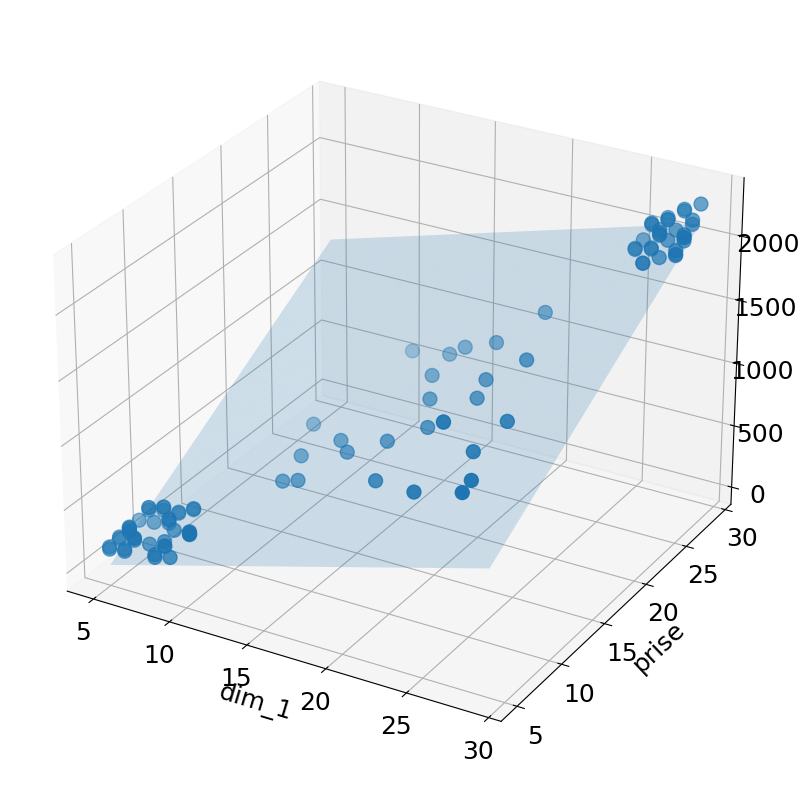

In [222]:
fig = plt.figure(figsize=(10,10))
ax = plt.axes(projection="3d")

ax.scatter(houses["dim_1"], houses["dim_2"], houses["price"], s=100)
ax.plot_trisurf(d1.ravel(), d2.ravel(), p.ravel(), alpha=0.2)

ax.set_xlabel("dim_1")
ax.set_ylabel("dim_2")
ax.set_ylabel("prise")
ax.elev = 27
fig.show

In [233]:
reg.predict(np.array(400,200).reshape(-1,1),axis=1)

TypeError: Cannot interpret '200' as a data type